[View in Colaboratory](https://colab.research.google.com/github/abhinavrk/GoogleColabMusings/blob/master/torch_tutorial.ipynb)

# What is Pytorch

In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor(1.00000e-37 *
       [[ 2.7389,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000]])


In [4]:
x = torch.rand(5, 3)
print(x)


tensor([[ 0.8858,  0.7787,  0.2055],
        [ 0.7969,  0.9603,  0.5067],
        [ 0.1421,  0.0221,  0.6333],
        [ 0.8726,  0.3720,  0.0765],
        [ 0.1968,  0.1332,  0.4348]])


In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])


In [7]:
x = torch.tensor([5.5, 3])
print(x)

tensor([ 5.5000,  3.0000])


In [8]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)
tensor([[ 1.7475,  0.9172, -0.9811],
        [-0.8624, -0.6107, -2.1555],
        [ 0.1523, -0.9467,  0.0952],
        [ 0.2686, -1.2228, -0.4925],
        [ 0.1598,  0.8110,  0.7318]])


In [9]:
print(x.size())

torch.Size([5, 3])


In [10]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 2.0146,  0.9481,  0.0142],
        [-0.6639,  0.2515, -1.6063],
        [ 0.7273, -0.1162,  0.8218],
        [ 0.5404, -0.9030,  0.2436],
        [ 0.2292,  1.4945,  0.8081]])


In [11]:
print(torch.add(x, y))

tensor([[ 2.0146,  0.9481,  0.0142],
        [-0.6639,  0.2515, -1.6063],
        [ 0.7273, -0.1162,  0.8218],
        [ 0.5404, -0.9030,  0.2436],
        [ 0.2292,  1.4945,  0.8081]])


In [12]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 2.0146,  0.9481,  0.0142],
        [-0.6639,  0.2515, -1.6063],
        [ 0.7273, -0.1162,  0.8218],
        [ 0.5404, -0.9030,  0.2436],
        [ 0.2292,  1.4945,  0.8081]])


In [13]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 2.0146,  0.9481,  0.0142],
        [-0.6639,  0.2515, -1.6063],
        [ 0.7273, -0.1162,  0.8218],
        [ 0.5404, -0.9030,  0.2436],
        [ 0.2292,  1.4945,  0.8081]])


In [14]:
print(x[:, 1])

tensor([ 0.9172, -0.6107, -0.9467, -1.2228,  0.8110])


In [15]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [16]:
a = torch.ones(5)
print(a)

tensor([ 1.,  1.,  1.,  1.,  1.])


In [17]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [18]:
a.add_(1)
print(a)
print(b)

tensor([ 2.,  2.,  2.,  2.,  2.])
[2. 2. 2. 2. 2.]


In [19]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)


In [20]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 0.8624,  1.3965,  1.1757,  1.3538],
        [ 0.8049,  0.8824,  0.5007,  1.6184],
        [ 1.1935,  1.6094,  1.3424,  1.3359],
        [-0.8174,  1.8935,  1.1532, -0.3462]], device='cuda:0')
tensor([[ 0.8624,  1.3965,  1.1757,  1.3538],
        [ 0.8049,  0.8824,  0.5007,  1.6184],
        [ 1.1935,  1.6094,  1.3424,  1.3359],
        [-0.8174,  1.8935,  1.1532, -0.3462]], dtype=torch.float64)


# Summary - PyTorch Numpy

Essentially this is just a numpy wrapper. Running something explicitly on GPU (i.e. creating a matrix on the GPU directly so all future operations run on the GPU as well). 

# Autograd - Automatic Differentiation

In [0]:
import torch

In [22]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[ 1.,  1.],
        [ 1.,  1.]])


In [23]:
y = x + 2
print(y)

tensor([[ 3.,  3.],
        [ 3.,  3.]])


In [24]:
print(y.grad_fn)

In [25]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[ 27.,  27.],
        [ 27.,  27.]]) tensor(27.)


In [26]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [0]:
out.backward()

In [28]:
print(x.grad)

tensor([[ 4.5000,  4.5000],
        [ 4.5000,  4.5000]])


In [29]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ -458.1458, -1199.5879,   484.2182])


In [30]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([  102.4000,  1024.0000,     0.1024])


In [31]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# Summary - Autograd

The autograd package automatically tracks all the operations performed on the inputs, and uses it to automatically calculate the derivative.

## Unsure

What the hell is `grad_tensors` - why does `y.backwards` take in an input. Is this to account for the metric? is this just the metric tensor? does this mean you're not allowed to have variable metric-tensors?

# Neural Networks using PyTorch

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [34]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.1516, -0.1312, -0.0225, -0.0479,  0.1226, -0.1050, -0.0636,
          0.0138,  0.1072, -0.0928]])


In [0]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [36]:
output = net(input)
target = torch.arange(1, 11)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(38.6465)


In [37]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

In [38]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([ 0.,  0.,  0.,  0.,  0.,  0.])
conv1.bias.grad after backward
tensor([ 0.1150, -0.0229, -0.0858, -0.0783,  0.0877, -0.0153])


In [0]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [0]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

# Training a classifier

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


  car plane plane truck


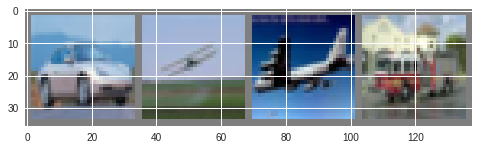

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [46]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.216
[1,  4000] loss: 1.872
[1,  6000] loss: 1.686
[1,  8000] loss: 1.575
[1, 10000] loss: 1.516
[1, 12000] loss: 1.475
[2,  2000] loss: 1.406
[2,  4000] loss: 1.363
[2,  6000] loss: 1.356
[2,  8000] loss: 1.315
[2, 10000] loss: 1.288
[2, 12000] loss: 1.294
Finished Training


GroundTruth:    cat  ship  ship plane


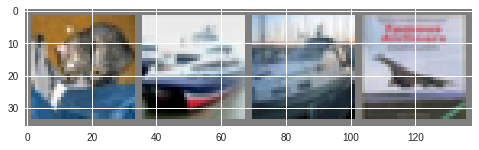

In [47]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images)

In [49]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [50]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [51]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 47 %
Accuracy of   car : 56 %
Accuracy of  bird : 36 %
Accuracy of   cat : 28 %
Accuracy of  deer : 53 %
Accuracy of   dog : 42 %
Accuracy of  frog : 74 %
Accuracy of horse : 58 %
Accuracy of  ship : 81 %
Accuracy of truck : 67 %


In [52]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cuda:0


In [53]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
inputs, labels = inputs.to(device), labels.to(device)